<a href="https://colab.research.google.com/github/suri-pu-bi/baekjoon_study/blob/main/MNIST_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset을 이용한 분류

##데이터 준비 (Preparing the data)

In [40]:
import tensorflow.keras.datasets as datasets
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
print(tf.__version__)

2.7.0


In [41]:
# MNIST 손글씨 이미지 데이터 로드
# (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# print('shape of x_train:', x_train.shape)
# print('shape of y_train:', y_train.shape)
# print('shape of x_test:', x_test.shape)
# print('shape of y_test:', y_test.shape)

In [42]:
#fashion MNIST 데이터 불러오기
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()
print('shape of x_train:', x_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of x_test:', x_test.shape)
print('shape of y_test:', y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


In [43]:
#Training dataset의 0번째 이미지 배열
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

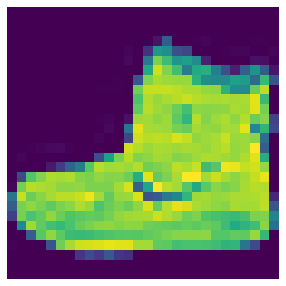

In [44]:
# 샘플 이미지 시각화
def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

# 시각화할 데이터셋과 인덱스
plot_image(x_train, 0)

In [45]:
# label 값 출력
y_train[0]

9

In [46]:
# reshape and normalization
# DNN모델의 input에 넣기 위해서 28 by 28 2차원배열 이미지를 옆으로 길게 펼친 데이터형태로 변형(reshape)
# 픽셀값 0~255 사이의 값을 0~1사이의 실수값으로 변환
x_train = x_train.reshape((60000, 28 * 28)) / 255.0
x_test = x_test.reshape((10000, 28 * 28)) / 255.0

##모델구축 (Building the model)

해당 DNN모델 시각화  
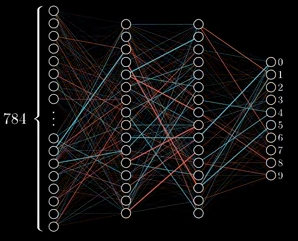

In [47]:
# Sequential model
model = tf.keras.models.Sequential()

# Stacking layers
# 1개의 완전히 연결된 은닉층(Fully Connected Hidden Layeer)을 쌓음
# 10개의 classes별 확률을 반환하는 FC(Fully Connected) Output LAyer를 쌓음
# 보통 softmax 함수는 클래스 분류 문제에 사용됨
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_dim=28*28))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


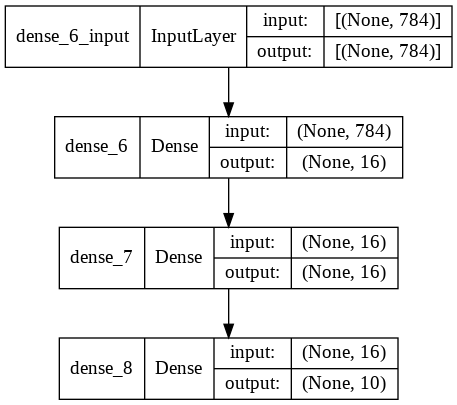

In [49]:
# keras model visualization
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True)

##모델 컴파일 (Compiling the model)

In [50]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

##모델 학습 (Training the model)

In [51]:
history=model.fit(x_train, y_train, 
          epochs=10, 
          verbose=1, 
          validation_split=0.2 
          )

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0679 - accuracy: 0.6227 - val_loss: 0.6635 - val_accuracy: 0.7681
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5905 - accuracy: 0.7936 - val_loss: 0.5416 - val_accuracy: 0.8102
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5178 - accuracy: 0.8184 - val_loss: 0.4989 - val_accuracy: 0.8294
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4827 - accuracy: 0.8314 - val_loss: 0.4847 - val_accuracy: 0.8347
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4601 - accuracy: 0.8405 - val_loss: 0.4660 - val_accuracy: 0.8361
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4442 - accuracy: 0.8446 - val_loss: 0.4449 - val_accuracy: 0.8455
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4307 - accuracy: 0.8490 - val_loss: 0.4307 - val_accuracy:

##모델 평가 및 예측 (Evaluating the model and predicting for new data)

In [52]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.8426


[0.44443535804748535, 0.8425999879837036]

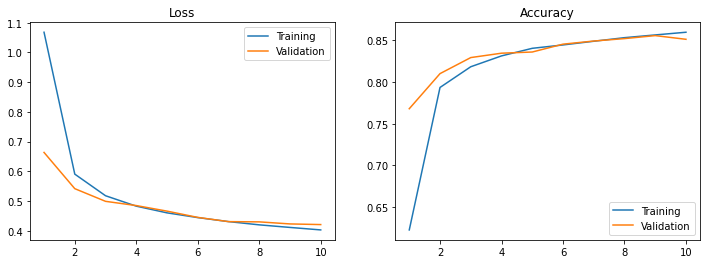

In [53]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss'] 
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

In [54]:
preds = model.predict(x_test, batch_size=128)

In [55]:
# MNIST의 특정 데이터가 어느 class와 유사도를 출력
# print(preds[0])
# 각각의 class에 대한 예측값중 가장 확률이 큰 값 출력
# print("0번째 값 predict : {}".format(np.argmax(preds[0])))
# print("0번째 값 label : {}\n".format(y_test[0]))
# plt.imshow(x_test[0].reshape(28, 28))
# plt.show()

[9.9052479e-05 3.0091194e-06 7.6236945e-05 8.0361888e-06 2.4615653e-07
 3.7465960e-02 4.1388062e-06 1.1653757e-01 1.7851063e-03 8.4402066e-01]
0번째 값 predict : Ankle boot
0번째 값 label : Ankle boot



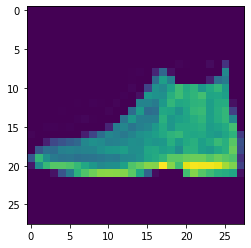

In [56]:
#fashion MNIST의 특정 데이터가 어느 class와 유사도를 출력
#각각의 class에 대한 예측값중 가장 확률이 큰 값 출력

print(preds[0])

labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print("0번째 값 predict : {}".format(labels[np.argmax(preds[0])]))
print("0번째 값 label : {}\n".format(labels[y_test[0]]))
plt.imshow(x_test[0].reshape(28, 28))
plt.show()